In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
YEAR = 2023
cs = pd.read_csv(f"../dataset/imbank_customer_data/customer_newCols_{YEAR}.csv", encoding = 'euc-kr')

In [63]:
cs

,Unnamed: 0,기준년월,고객ID,성별,고객등급,자택_시도,수신_요구불예금,수신_거치식예금,수신_적립식예금,대출금액,수신잔고,지역구분,수신대비대출비율,연령대,이탈여부
0,0,202301,2455116820,여,일반등급,대구광역시,0,0,0,0,0,1,0.0,20대,유지
1,1,202301,2455184950,남,일반등급,광주광역시,0,0,0,100000,0,0,0.0,20대,유지
2,2,202301,2455509120,여,일반등급,대구광역시,0,0,0,0,0,1,0.0,20대,이탈
3,3,202301,2455596436,여,일반등급,부산광역시,600000,0,0,0,600000,0,0.0,30대,유지
4,4,202301,2455600426,남,일반등급,경상북도,0,0,0,0,0,1,0.0,30대,이탈
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312019,2312019,202312,9996525010,남,일반등급,대구광역시,0,0,0,0,0,1,0.0,30대,이탈
2312020,2312020,202312,9996550317,남,일반등급,대구광역시,21000000,0,0,0,21000000,1,0.0,30대,이탈
2312021,2312021,202312,9996589620,여,일반등급,경상북도,0,0,0,0,0,1,0.0,30대,이탈
2312022,2312022,202312,9996666899,남,일반등급,경상북도,100000,0,0,0,100000,1,0.0,30대,이탈


In [88]:
TARGET = '수신잔고'

In [112]:
# 간단한 box plot 그리기
# 시각화 그리기 한글폰트 가가

def boxplot(df, target, min=None, max=None):
    plt.rc("font", family = "Malgun Gothic")
    sns.set(font="Malgun Gothic", 
    rc={"axes.unicode_minus":False}, style='white')

    fig, ax = plt.subplots(figsize = (8, 6))
    filtered_data = df[df['연령대'].isin(['20대', '30대'])]
    sns.boxplot(filtered_data, x = '이탈여부', y = target, width=0.3, hue='연령대')
    if min or max:
        plt.ylim(min, max)
    plt.show()

def get_iqr(df, target, churn):
    # 이탈 확인
    _df=df[df['이탈여부']==churn]
    # 이상치 비율 확인
    # 1분위
    q1 = _df[target].quantile(q=0.25)
    # 3분위
    q3 = _df[target].quantile(q=0.75)
    iqr =  q3 - q1

    print(f"{churn} 이상치 경계 min: {q1}, max: {q3}")

    outlier = df[(df[target] >= (q3 + 1.5*iqr)) | (df[target] <= (q1 - 1.5*iqr))]
    ratio = outlier[target].count() / df[target].count()
    print(f"{churn} 이상치 비율: {round(ratio, 3)}")
    df = df[(df[target] < (q3 + 1.5*iqr)) & (df[target] > (q1 - 1.5*iqr))]

    return df

def dropOutlier(df, target):

    churn = get_iqr(df, target, '이탈')
    nonChurn = get_iqr(df, target, '유지')

    df = pd.concat([churn, nonChurn])
    
    return df

def displot(df, target):
    sns.displot(df[target], kde=True, hue = '이탈여부')
    plt.show()


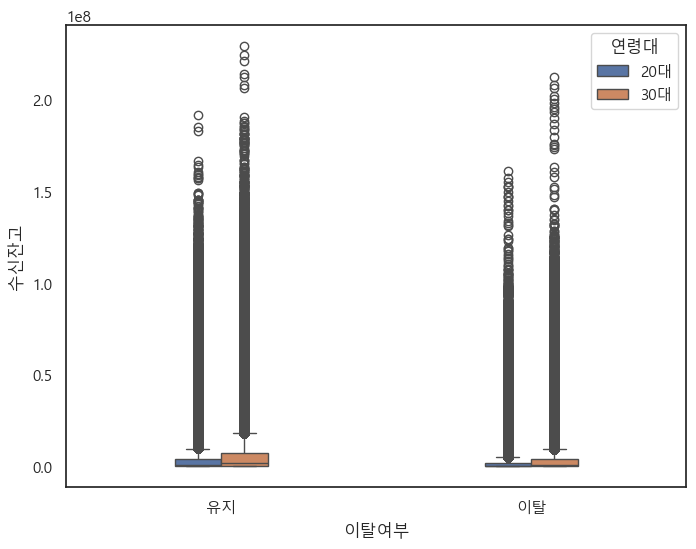

In [78]:
boxplot(cs, TARGET)

이탈 이상치 경계 min: 0.0, max: 2600000.0
이탈 이상치 비율: 0.204
유지 이상치 경계 min: 200000.0, max: 5400000.0
유지 이상치 비율: 0.107


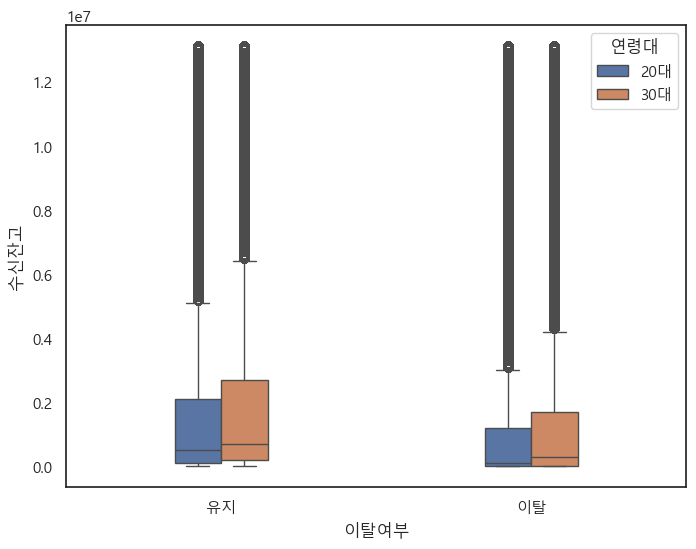

In [94]:
TARGET = '수신잔고'
boxplot(dropOutlier(cs, TARGET), TARGET)

In [113]:
displot(dropOutlier(cs, TARGET),TARGET)

이탈 이상치 경계 min: 0.0, max: 2600000.0
이탈 이상치 비율: 0.204
유지 이상치 경계 min: 200000.0, max: 5400000.0
유지 이상치 비율: 0.107


ValueError: The following variable cannot be assigned with wide-form data: `hue`

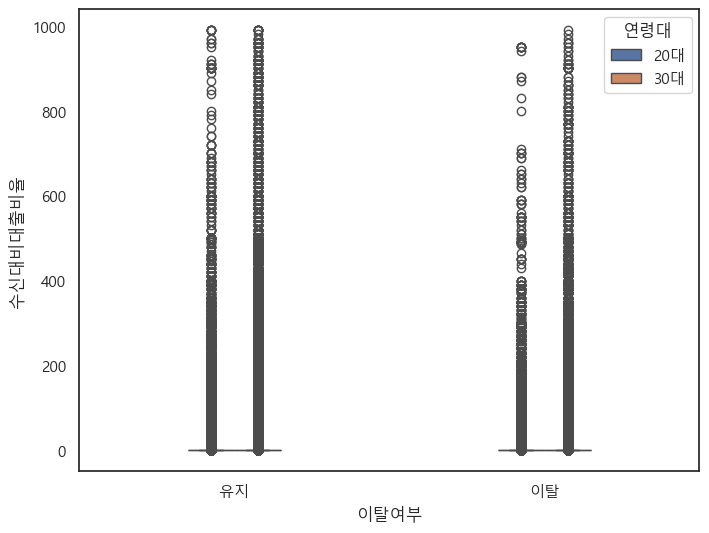

In [81]:
TARGET = '수신대비대출비율'
boxplot(cs, TARGET)

In [82]:
dropOutlier(cs, TARGET)

이탈 이상치 경계 min: 0.0, max: 0.0
이탈 이상치 비율: 0.068
유지 이상치 경계 min: 0.0, max: 0.0
유지 이상치 비율: 0.068


,Unnamed: 0,기준년월,고객ID,성별,고객등급,자택_시도,수신_요구불예금,수신_거치식예금,수신_적립식예금,대출금액,수신잔고,지역구분,수신대비대출비율,연령대,이탈여부


In [83]:
c = pd.read_csv(f"../dataset/imbank_card_data/card_newCols_{YEAR}.csv", encoding = 'euc-kr')
c

,Unnamed: 0,거래년월,고객ID,월별승인금액합계,월별승인건수평균,이탈여부,연령대
0,0,202301,4315412612,50000,1.000000,유지,30대
1,1,202301,6463199548,50000,1.000000,유지,30대
2,2,202301,4836970091,20000,1.000000,유지,20대
3,3,202301,5410188013,20000,1.000000,유지,20대
4,4,202301,3577716603,50000,2.000000,유지,20대
...,...,...,...,...,...,...,...
1613896,6265856,202312,2431122077,1040000,1.307692,유지,20대
1613897,6265857,202312,3343332290,1110000,1.230769,유지,20대
1613898,6265858,202312,3433762288,810000,1.000000,유지,20대
1613899,6265869,202312,4406597530,2600000,1.037037,유지,30대


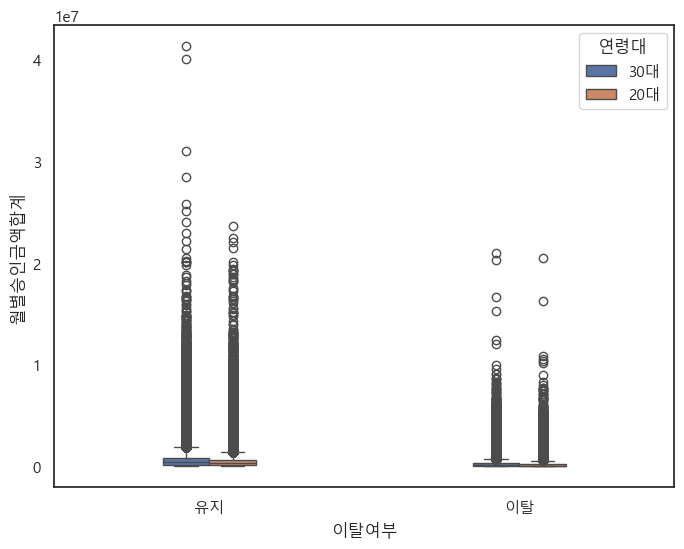

In [84]:
TARGET = '월별승인금액합계'
boxplot(c, TARGET)

이탈 이상치 경계 min: 30000.0, max: 270000.0
이탈 이상치 비율: 0.265
유지 이상치 경계 min: 110000.0, max: 710000.0
유지 이상치 비율: 0.057


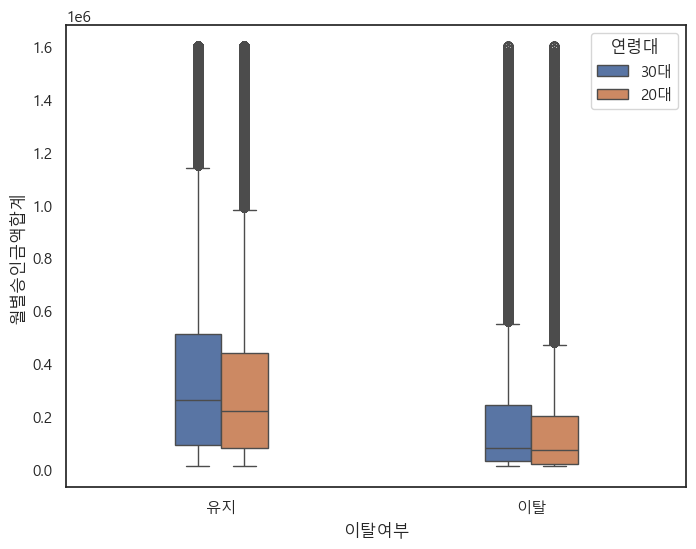

In [85]:
boxplot(dropOutlier(c, TARGET), TARGET)

이탈 이상치 경계 min: 30000.0, max: 270000.0
이탈 이상치 비율: 0.265
유지 이상치 경계 min: 110000.0, max: 710000.0
유지 이상치 비율: 0.057


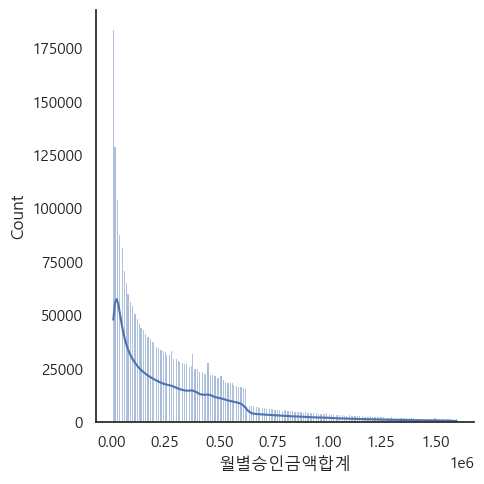

In [86]:
sns.displot(dropOutlier(c, TARGET)[TARGET], kde=True)
plt.show()